In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [3]:
# Read from extracted data
flights_df = pd.read_csv('../data/flights_all_2022-10-27_1616.csv')

/var/folders/1m/wlv_4s950j15c3grd3ny62mr0000gn/T/ipykernel_34944/3710073075.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('../data/flights_all_2022-10-27_1616.csv')


In [4]:
flights_df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [5]:
flights_df.shape

(15927485, 33)

#### Group states into four regions


In [6]:
regions = {
    'WA': 'West',
    'OR': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'CA': 'West',
    'NV': 'West',
    'UT': 'West',
    'AZ': 'West',
    'CO': 'West',
    'NM': 'West',
    'HI': 'West',
    'AK': 'West',
    'TT': 'West',
    
    'ND': 'Midwest',
    'SD': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'MN': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'MI': 'Midwest',
    'OH': 'Midwest',

    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'KY': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'DE': 'South',
    'MD': 'South',
    'NC': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
    'PR': 'South',
    'VI': 'South',

    'PA': 'Northeast',
    'NY': 'Northeast',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'CT': 'Northeast',
    'RI': 'Northeast',
    'NJ': 'Northeast'

    }

## Create new columns

### 1. Split cities and states. Group states into four regions - 'West', 'Midwest', 'Northeast', 'South'

In [7]:
# Split City and State 
flights_df[['origin_city', 'origin_state']] = flights_df['origin_city_name'].str.split(", ",expand=True,) 
flights_df[['dest_city', 'dest_state']] = flights_df['dest_city_name'].str.split(", ",expand=True,) 

In [8]:
flights_df=flights_df.replace({"origin_state": regions})
flights_df=flights_df.replace({"dest_state": regions})

In [9]:
# Rename origin_state/dest_state columns to origin_region/dest_region
flights_df = flights_df.rename(columns={'origin_state': 'origin_region', 'dest_state': 'dest_region'})

### 2. Extract day, month, and year

In [10]:
flights_df['day'] = pd.DatetimeIndex(flights_df['fl_date']).day
flights_df['month'] = pd.DatetimeIndex(flights_df['fl_date']).month
flights_df['year'] = pd.DatetimeIndex(flights_df['fl_date']).year

### 3. Four categories of flight time - 'Morning', 'Afternon', 'Evening', and 'Night'

In [11]:
# Converting time into 24 hours
flights_df['crs_arr_hrs'] = (flights_df['crs_arr_time']/100).astype(int)
flights_df['crs_dep_hrs'] = (flights_df['crs_dep_time']/100).astype(int)

In [12]:
ctg = []
for i in flights_df['crs_dep_hrs']:
    if (i>=5) and (i<12):
        ctg.append('Morning')
    elif (i>=12) and (i<16):
        ctg.append('Afternoon')
    elif (i>=16) and (i<=22):
        ctg.append('Evening')
    elif (i>22) or (i<5):
        ctg.append('Night')

flights_df['dep_hrs_ctg'] = ctg       

In [13]:
# Four categories of flight time - 'Morning', 'Afternon', 'Evening', and 'Night' for crs_arr_hrs

ctg = []
for i in flights_df['crs_arr_hrs']:
    if (i>=5) and (i<12):
        ctg.append('Morning')
    elif (i>=12) and (i<16):
        ctg.append('Afternoon')
    elif (i>=16) and (i<=22):
        ctg.append('Evening')
    elif (i>22) or (i<5):
        ctg.append('Night')

flights_df['arr_hrs_ctg'] = ctg   

### 4. Day of the week (where Monday is 0)

In [14]:
flights_df['fl_date'][0]

'2019-08-22'

In [15]:
# Conver object to datatime format
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'])

In [16]:
# Convert datetime column/series to day of the week
flights_df['day_of_week'] = flights_df['fl_date'].dt.weekday

In [17]:
# Replace day numbers with day names
flights_df = flights_df.replace({'day_of_week' : { 
                                                    0 : 'Monday', 
                                                    1 : 'Tuesday', 
                                                    2 : 'Wednesday', 
                                                    3: 'Thursday', 
                                                    4: 'Friday', 
                                                    5: 'Saturday', 
                                                    6: 'Sunday'}})

In [18]:
# To get the name of the day of the week 
# print(calendar.day_name[my_date.weekday()])

In [19]:
flights_df['fl_date'].unique()

array(['2019-08-22T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-08-25T00:00:00.000000000',
       '2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-08-29T00:00:00.000000000', '2019-08-31T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-02-02T00:00:00.000000000',
       '2019-02-06T00:00:00.000000000', '2019-02-03T00:00:00.000000000',
       '2019-02-04T00:00:00.000000000', '2019-02-05T00:00:00.000000000',
       '2019-02-07T00:00:00.000000000', '2019-02-09T00:00:00.000000000',
       '2019-02-10T00:00:00.000000000', '2019-02-11T00:00:00.000000000',
       '2019-02-12T00:00:00.000000000', '2019-02-08T00:00:00.000000000',
       '2019-02-13T00:00:00.000000000', '2019-02-14T00:00:00.000000000',
       '2019-02-17T00:00:00.000000000', '2019-02-18T00:00:00.000000000',
       '2019-02-15T00:00:00.000000000', '2019-02-16

### 5. Day of year

In [20]:
# Convert datetime column/series to year
flights_df['day_of_year'] = flights_df['fl_date'].dt.day_of_year

### 6. Week of year

In [21]:
# Convert datetime column/series to week of year
flights_df['week_of_year'] = flights_df['fl_date'].dt.isocalendar().week

### 7. Divide the flight into short, medium, and long haul flights based on air-time

In [22]:
length=[]

for i in flights_df['air_time']:
    if i < (180): # less than 3 hours
        length.append('short')
    elif (i >= (180)) and (i <= (360)): #between 3 and 6 hours
        length.append('medium')
    else: length.append('long') # more than 6 hours

flights_df['haul_length'] = length   

### Check

In [23]:
flights_df.shape

(15927485, 48)

In [24]:
flights_df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'origin_city', 'origin_region', 'dest_city',
       'dest_region', 'day', 'month', 'year', 'crs_arr_hrs', 'crs_dep_hrs',
       'dep_hrs_ctg', 'arr_hrs_ctg', 'day_of_week', 'day_of_year',
       'week_of_year', 'haul_length'],
      dtype='object')

In [25]:
# Save pd as csv
flights_df.to_csv('flights_before_silvias_part.csv', index=False)

## Silvia's part

In [2]:
from midterm_functions import *

In [27]:
 # CONVERT crs_dep_time TO DATETIME OBJECT
column = 'crs_dep_time'
flights_df = time_columns(flights_df,column,format='%H%M',dropna=True)

In [28]:
# To flights table, add columns with the  features for date and forecasting date
flights_df = date_forecast_columns(flights_df,date_column='fl_date',format='%Y-%m-%d')

In [29]:
# Calculate mean dep_delay and arr_delay for a given carrier 
groupby_columns_1 = ['mkt_carrier', 'origin_airport_id']
columns = ['dep_delay', 'arr_delay'] # columns on which to get aggregate data
flights_df = flights_df.groupby(
    groupby_columns_1,group_keys=False).apply( # for a given month
        lambda x: aggregate(x,columns,'carrier_origin_month').groupby(
    groupby_columns_1,group_keys=False).apply( # for a given WEEK OF THE YEAR
        lambda x: aggregate(x,columns,'carrier_origin_week')).groupby(
    groupby_columns_1,group_keys=False).apply( # for a given DAY OF YEAR
        lambda x: aggregate(x,columns,'carrier_origin_date')))

In [30]:
# FORECASTING DATA COLUMNS: ['dep_delay', 'arr_delay']
# columns for self-join using forecasting columns
columns_list = [
    'mean_dep_delay_carrier_origin_date',
    'mean_arr_delay_carrier_origin_date'
]

In [34]:
# Mean delay for the 7 days ago
groupby_tm1_week_date = groupby_columns_1 + ['fl_date_t-1_week_date'] 
# Mean delay for the 1 week before
groupby_tm1_week_week_number = groupby_columns_1 + ['fl_date_t-1_week_week_number']
# Mean delay for the same week 1 year ago
groupby_tm1_year_week = groupby_columns_1 + ['year','fl_date_week_number'] # SH 2022-10-27 19:11 updated
# Mean delay for the same MONTH 1 year ago; 
groupby_tm1_year_month = groupby_columns_1 + ['month'] # SH 2022-10-27 19:11 updated

In [36]:
flights_df.filter(regex='date').dtypes

fl_date                               datetime64[ns]
fl_date_dt                            datetime64[ns]
fl_date_year                           period[A-DEC]
fl_date_year_month                         period[M]
fl_date_Monday_of_week                datetime64[ns]
fl_date_week_number                           UInt32
fl_date_t-1_week_week_number                  UInt32
fl_date_t-1_week_date                 datetime64[ns]
fl_date_t-1_year_year                          int64
fl_date_t-1_year_month                         int64
fl_date_t-1_year_day                  datetime64[ns]
mean_dep_delay_carrier_origin_date           float64
mean_arr_delay_carrier_origin_date           float64
dtype: object

In [37]:
 # ADD FORECASTING COLUMNS WITH SELF-JOIN
flights_df = flights_df.merge( 
                flights_df.filter(items=columns_list + groupby_tm1_week_date).groupby(groupby_tm1_week_date).mean(), # Mean delay for the 7 days ago
                how='left',
                # indicator='merge_tm1_week_date',
                left_on=groupby_columns_1+['fl_date_dt'],
                right_index=True,
                suffixes=[None,'_t-1_week'],
                copy=False
        ).merge( 
                flights_df.filter(items=columns_list + groupby_tm1_week_week_number).groupby(groupby_tm1_week_week_number).mean(), # Mean delay for the 1 week before # YES
                how='left',
                # indicator='merge_tm1_week_week_number',
                left_on=groupby_columns_1+['fl_date_week_number'],
                right_index=True,
                suffixes=[None,'_t-1_week_week_number'],
                copy=False
        ).merge(
                flights_df.filter(items=columns_list+ groupby_tm1_year_week).groupby(groupby_tm1_year_week).mean(), # Mean delay for the same week 1 year ago
                how='left',
                # indicator='merge_tm1_year_week',
                right_index=True, 
                left_on=groupby_columns_1+['fl_date_t-1_year_year','fl_date_week_number'],
                suffixes=[None,'t-1_year_week'],
                copy=False
        ).merge( 
                flights_df.filter(items=columns_list+groupby_tm1_year_month).groupby(groupby_tm1_year_month).mean(),# Mean delay for the same MONTH 1 year ago; 
                how='left',
                # indicator='merge_tm1_year_month',
                left_on=groupby_columns_1+['fl_date_t-1_year_month'],
                right_index=True,
                suffixes=[None,'_t-1_year_month'],
                copy=False

)

In [38]:
flights_df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'origin_city', 'origin_region', 'dest_city',
       'dest_region', 'day', 'month', 'year', 'crs_arr_hrs', 'crs_dep_hrs',
       'dep_hrs_ctg', 'arr_hrs_ctg', 'day_of_week', 'day_of_year',
       'week_of_year', 'haul_length', 'crs_dep_time_dt', 'crs_dep_time_hour',
       'fl_date_dt', 'fl_date_year', 'fl_date_year_month',
       'fl_date_Monday_of_week', 'fl_date_week_number',
  

In [39]:
flights_df.shape

(15927485, 74)

In [41]:
# Drop columns
columns_dropped = ['origin_city_name', 'dest_city_name', 'taxi_out', 'taxi_in', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay']

In [43]:
flights_df = flights_df.drop(columns = columns_dropped)

In [44]:
flights_df.shape

(15927485, 65)

### SAVE

In [45]:
# Save the file to CSV
from datetime import datetime
datetime_now = datetime.now().strftime('%Y-%m-%d_%H%M')
filename = f'flights_{datetime_now}.csv'
print(filename)

flights_2022-10-27_1948.csv


In [46]:
# Save pd as csv
flights_df.to_csv('flights_2022-10-27_1948.csv', index=False)

Read

In [22]:
# Read from extracted data
flights_df = pd.read_csv('flights_2022-10-27_1948.csv')

/var/folders/1m/wlv_4s950j15c3grd3ny62mr0000gn/T/ipykernel_36061/3197554248.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('flights_2022-10-27_1948.csv')


In [5]:
# flights_df.set_index(flights_df.columns[0], inplace=True)

In [23]:
flights_df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'origin_city', 'origin_region',
       'dest_city', 'dest_region', 'day', 'month', 'year', 'crs_arr_hrs',
       'crs_dep_hrs', 'dep_hrs_ctg', 'arr_hrs_ctg', 'day_of_week',
       'day_of_year', 'week_of_year', 'haul_length', 'crs_dep_time_dt',
       'crs_dep_time_hour', 'fl_date_dt', 'fl_date_year', 'fl_date_year_month',
       'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_t-1_year_year', 'fl_date_t-1_year_month',
       'fl_date_t-1_year_day', 'mean_dep_de

### Passangers table

In [24]:
# PASSENGERS TABLE
# Load the CSV file with the variable name `passengers` for convenience.
passengers = pd.read_csv('../data/passengers_2022-10-27_1727.csv')

In [25]:
# Calculate average per departure
col_for_averaging = [
    'payload',
    'seats',
    'passengers',
    'freight',
    'mail',
]

In [26]:
# Calculate average per departure
for column in col_for_averaging:
    passengers[str('mean_'+column+'_per_departure')] = passengers[column] / passengers['departures_performed']

In [27]:
# calculate mean empty seats
passengers['mean_empty_seats_per_departure'] = passengers['mean_seats_per_departure'] - passengers['mean_passengers_per_departure']

In [28]:
# Drop columns whose data were put into the new columns as 'mean_.*'
passengers.drop(columns=col_for_averaging, inplace=True)

In [29]:
passengers.shape

(515663, 16)

### Merge Flights df with Passengers df

In [30]:
# Prepare for the merge!
left_join_columns = ['mkt_carrier','origin_airport_id', 'dest_airport_id', 
    'fl_date_t-1_year_year', 'month']
right_join_columns = ['carrier','origin_airport_id', 'dest_airport_id', 
    'year', 'month']

In [31]:
# Join flights and passengers table
flights = flights_df.merge(
    passengers,how='left',left_on=left_join_columns, 
    right_on=right_join_columns, indicator=True
)
flights

,mkt_carrier,mkt_carrier_fl_num,fl_date,branded_code_share,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,unique_carrier,airline_id,year_y,mean_payload_per_departure,mean_seats_per_departure,mean_passengers_per_departure,mean_freight_per_departure,mean_mail_per_departure,mean_empty_seats_per_departure,_merge
0,AS,121,2019-08-22,AS,AS,121,14747,10299,40,37.0,...,AS,19930.0,2018.0,39916.129032,0.0,0.000000,20607.419355,2626.096774,0.000000,both
1,AS,121,2019-08-22,AS,AS,121,14747,10299,40,37.0,...,AS,19930.0,2018.0,34050.000000,124.0,103.750000,159.600000,4.150000,20.250000,both
2,AS,121,2019-08-22,AS,AS,121,14747,10299,40,37.0,...,AS,19930.0,2018.0,39912.500000,159.0,127.479167,1134.729167,22.437500,31.520833,both
3,AS,121,2019-08-22,AS,AS,121,14747,10299,40,37.0,...,AS,19930.0,2018.0,42708.247423,178.0,138.000000,1069.041237,59.773196,40.000000,both
4,AS,121,2019-08-22,AS,AS,121,14747,10299,40,37.0,...,AS,19930.0,2018.0,46199.092971,178.0,142.623583,995.428571,83.068027,35.376417,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26981363,AS,120,2019-08-22,AS,AS,120,10299,14747,1630,1622.0,...,AS,19930.0,2018.0,39700.000000,0.0,0.000000,24340.142857,1393.571429,0.000000,both
26981364,AS,120,2019-08-22,AS,AS,120,10299,14747,1630,1622.0,...,AS,19930.0,2018.0,33900.000000,124.0,108.500000,1221.333333,0.000000,15.500000,both
26981365,AS,120,2019-08-22,AS,AS,120,10299,14747,1630,1622.0,...,AS,19930.0,2018.0,39963.461538,159.0,138.538462,838.865385,47.980769,20.461538,both
26981366,AS,120,2019-08-22,AS,AS,120,10299,14747,1630,1622.0,...,AS,19930.0,2018.0,42704.123711,178.0,160.896907,489.680412,18.371134,17.103093,both


In [32]:
flights.drop_duplicates(subset=['mkt_carrier','fl_date','mkt_carrier_fl_num'], inplace=True)

In [33]:
flights.shape

(12347377, 79)

### Save

In [34]:
# Save pd as csv
flights_df.to_csv('flights_passengers_2022-10-27_2035.csv', index=False)

# Cleaning

In [35]:
flights.head()

,mkt_carrier,mkt_carrier_fl_num,fl_date,branded_code_share,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,...,unique_carrier,airline_id,year_y,mean_payload_per_departure,mean_seats_per_departure,mean_passengers_per_departure,mean_freight_per_departure,mean_mail_per_departure,mean_empty_seats_per_departure,_merge
0,AS,121,2019-08-22,AS,AS,121,14747,10299,40,37.0,...,AS,19930.0,2018.0,39916.129032,0.0,0.00,20607.419355,2626.096774,0.00,both
5,AS,122,2019-08-22,AS,AS,122,10299,14747,1940,1929.0,...,AS,19930.0,2018.0,39700.000000,0.0,0.00,24340.142857,1393.571429,0.00,both
10,AS,123,2019-08-22,AS,AS,123,14747,11630,1350,1352.0,...,AS,19930.0,2018.0,39800.000000,159.0,142.00,445.500000,0.000000,17.00,both
13,AS,124,2019-08-22,AS,AS,124,11630,14747,1755,1745.0,...,AS,19930.0,2018.0,33700.000000,124.0,116.00,576.000000,0.000000,8.00,both
17,AS,125,2019-08-22,AS,AS,125,14057,10299,700,654.0,...,AS,19930.0,2018.0,42550.000000,178.0,141.25,1169.750000,194.500000,36.75,both


#### EDA

In [36]:
flights_df = flights[(flights['cancelled'] != 1) & (flights['diverted']!= 1)]

In [37]:
flights_df.shape

(12106445, 79)

In [39]:
explore(flights_df,print_n_unique=False).head(30)

Unique IDs: 11. # of rows: 12106445. Match: False



,Total,Percent
cancellation_code,12106445,1.000000e+00
total_add_gtime,12024921,9.932661e-01
longest_add_gtime,12024918,9.932658e-01
first_dep_time,12024916,9.932657e-01
mean_empty_seats_per_departure,7759021,6.409000e-01
mean_mail_per_departure,7759021,6.409000e-01
mean_freight_per_departure,7759021,6.409000e-01
mean_passengers_per_departure,7759021,6.409000e-01
mean_seats_per_departure,7759021,6.409000e-01
mean_payload_per_departure,7759021,6.409000e-01


In [40]:
# FLIGHTS TABLE TRAINING DATA: Fill mean flight historical/forecasting delay data. 
dict = {
    'mean_dep_delay_carrier_origin_date_t-1_week': 'mean_dep_delay_carrier_origin_week', 
    'mean_arr_delay_carrier_origin_date_t-1_week': 'mean_arr_delay_carrier_origin_week',
    'mean_dep_delay_carrier_origin_date_t-1_week_week_number': 'mean_dep_delay_carrier_origin_week',
    'mean_arr_delay_carrier_origin_date_t-1_week_week_number': 'mean_arr_delay_carrier_origin_week',
    'mean_dep_delay_carrier_origin_datet-1_year_week': 'mean_dep_delay_carrier_origin_week', # DON'T USE THIS FOR NOW
    'mean_arr_delay_carrier_origin_datet-1_year_week': 'mean_arr_delay_carrier_origin_week', # DON'T USE THIS FOR NOW
    'mean_dep_delay_carrier_origin_date_t-1_year_month': 'mean_dep_delay_carrier_origin_month', # DON'T USE THIS FOR NOW
    'mean_arr_delay_carrier_origin_date_t-1_year_month': 'mean_arr_delay_carrier_origin_month' # DON'T USE THIS FOR NOW
}
fill_missing(flights_df,dict,fill_w_mean=False) # Call the function
explore(flights_df.filter(regex='mean')) # Recheck missing values


/Users/ava_mac/Documents/Coding/LHL/W6/Predicting_Flight_Delays_Midterm/src/midterm_functions.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_to_fill].fillna(df[column_filler], inplace=True)


Unique IDs: 1320. # of rows: 12106445. Match: False



,Total,Percent
mean_empty_seats_per_departure,7759021,0.6409
mean_mail_per_departure,7759021,0.6409
mean_freight_per_departure,7759021,0.6409
mean_passengers_per_departure,7759021,0.6409
mean_seats_per_departure,7759021,0.6409
mean_payload_per_departure,7759021,0.6409
mean_arr_delay_carrier_origin_month,0,0.0000
mean_arr_delay_carrier_origin_date_t-1_year_month,0,0.0000
mean_dep_delay_carrier_origin_date_t-1_year_month,0,0.0000
mean_arr_delay_carrier_origin_datet-1_year_week,0,0.0000


In [41]:
df_with_passangers = flights_df.copy()

In [56]:
flights = df_with_passangers.copy()

In [55]:
# REMOVE FEATURES WITH NULL VALUES ABOVE THRESHOLD

def drop_features(df,threshold=100, show_update=True):
    """
    Drop columns in a dataframe with null values above the specified threshold.
    Parameters:
    - df: Dataframe.
    - threshold (float): Float between 0 and 100. 
        Threshold of % null values over which columns will be dropped.
    - show_update: If true, show missing values for the updated dataframe
        (calls the custom function explore)
    """ 
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    filter = missing_data['Percent'] > threshold
    to_drop = missing_data[filter].index.tolist()
    df.drop(to_drop, axis=1, inplace=True)
    print(f'Threshold of percentage values for dropping columns: {threshold}')
    print(f'Columns dropped: {to_drop}')
    # if show_update == True:
        # return explore(df,id=0,print_n_unique=False, printValues=False)
    return df

In [61]:
# REMOVE FEATURES WITH NULL VALUES ABOVE THRESHOLD
threshold = 0.6
flights = drop_features(flights,threshold=threshold,show_update=True)

Threshold of percentage values for dropping columns: 0.6
Columns dropped: ['mean_empty_seats_per_departure', 'mean_mail_per_departure', 'mean_freight_per_departure', 'mean_passengers_per_departure', 'mean_seats_per_departure', 'mean_payload_per_departure', 'departures_performed', 'airline_id', 'Unnamed: 0', 'distance_y', 'unique_carrier', 'carrier', 'year_y']


In [62]:
flights.shape

(12106445, 62)

In [63]:
explore(flights).head(30)

Unique IDs: 11. # of rows: 12106445. Match: False



,Total,Percent
air_time,6076,5.018814e-04
dep_delay,4142,3.421318e-04
arr_delay,2229,1.841168e-04
actual_elapsed_time,12,9.912076e-07
arr_time,10,8.260063e-07
dep_time,8,6.608051e-07
crs_elapsed_time,1,8.260063e-08
fl_date_year_month,0,0.000000e+00
fl_date_Monday_of_week,0,0.000000e+00
fl_date_week_number,0,0.000000e+00


Save just in case, not be used because of a big size of rows and missing passangers columns

In [64]:
# Save pd as csv
flights.to_csv('flights_data_2022-10-27_2155.csv', index=False)

Use this data for scaling, modelling

In [65]:
df = df_with_passangers.dropna(how='any')

In [68]:
df_with_passangers.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance_x', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'origin_city', 'origin_region',
       'dest_city', 'dest_region', 'day', 'month', 'year_x', 'crs_arr_hrs',
       'crs_dep_hrs', 'dep_hrs_ctg', 'arr_hrs_ctg', 'day_of_week',
       'day_of_year', 'week_of_year', 'haul_length', 'crs_dep_time_dt',
       'crs_dep_time_hour', 'fl_date_dt', 'fl_date_year', 'fl_date_year_month',
       'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_t-1_year_year', 'fl_date_t-1_year_month',
       'fl_date_t-1_year_day', 'mean_de

In [69]:
# Save pd as csv
df_with_passangers.to_csv('df_with_passangers_2022-10-27_1005.csv', index=False)

In [3]:
# Read from extracted data
df_with_passangers = pd.read_csv('df_with_passangers_2022-10-27_1005.csv')

/var/folders/1m/wlv_4s950j15c3grd3ny62mr0000gn/T/ipykernel_39496/1390462780.py:2: DtypeWarning: Columns (68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df_with_passangers = pd.read_csv('df_with_passangers_2022-10-27_1005.csv')


In [70]:
explore(df_with_passangers).head(30)

Unique IDs: 11. # of rows: 12106445. Match: False



,Total,Percent
cancellation_code,12106445,1.000000e+00
total_add_gtime,12024921,9.932661e-01
longest_add_gtime,12024918,9.932658e-01
first_dep_time,12024916,9.932657e-01
mean_empty_seats_per_departure,7759021,6.409000e-01
mean_mail_per_departure,7759021,6.409000e-01
mean_freight_per_departure,7759021,6.409000e-01
mean_passengers_per_departure,7759021,6.409000e-01
mean_seats_per_departure,7759021,6.409000e-01
mean_payload_per_departure,7759021,6.409000e-01


In [72]:
df_with_passangers.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance_x', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'origin_city', 'origin_region',
       'dest_city', 'dest_region', 'day', 'month', 'year_x', 'crs_arr_hrs',
       'crs_dep_hrs', 'dep_hrs_ctg', 'arr_hrs_ctg', 'day_of_week',
       'day_of_year', 'week_of_year', 'haul_length', 'crs_dep_time_dt',
       'crs_dep_time_hour', 'fl_date_dt', 'fl_date_year', 'fl_date_year_month',
       'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_t-1_year_year', 'fl_date_t-1_year_month',
       'fl_date_t-1_year_day', 'mean_de

In [4]:
df = df_with_passangers.dropna(subset=['departures_performed', 'distance_x', 'distance_y', 'unique_carrier', 'airline_id',
       'origin_airport_id', 'dest_airport_id', 'year_x','year_y', 'month',
       'mean_payload_per_departure', 'mean_seats_per_departure',
       'mean_passengers_per_departure', 'mean_freight_per_departure',
       'mean_mail_per_departure', 'mean_empty_seats_per_departure'])

In [5]:
df_with_passangers.shape

(12106445, 79)

In [6]:
df.shape

(4347424, 79)

In [86]:
df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance_x', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'origin_city', 'origin_region',
       'dest_city', 'dest_region', 'day', 'month', 'year_x', 'crs_arr_hrs',
       'crs_dep_hrs', 'dep_hrs_ctg', 'arr_hrs_ctg', 'day_of_week',
       'day_of_year', 'week_of_year', 'haul_length', 'crs_dep_time_dt',
       'crs_dep_time_hour', 'fl_date_dt', 'fl_date_year', 'fl_date_year_month',
       'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_t-1_year_year', 'fl_date_t-1_year_month',
       'fl_date_t-1_year_day', 'mean_de

In [7]:
explore(df)

Unique IDs: 10. # of rows: 4347424. Match: False



,Total,Percent
cancellation_code,4347424,1.000000
total_add_gtime,4317895,0.993208
longest_add_gtime,4317894,0.993207
first_dep_time,4317893,0.993207
mean_dep_delay_carrier_origin_week,0,0.000000
...,...,...
day,0,0.000000
dest_region,0,0.000000
dest_city,0,0.000000
origin_region,0,0.000000


In [8]:
df = df.drop(columns = ['actual_elapsed_time', 'cancellation_code', 'arr_time', 'dep_time', ])

In [9]:
df.shape

(4347424, 75)

In [10]:
explore(df).head(30)

Unique IDs: 10. # of rows: 4347424. Match: False



,Total,Percent
total_add_gtime,4317895,0.993208
longest_add_gtime,4317894,0.993207
first_dep_time,4317893,0.993207
mean_dep_delay_carrier_origin_datet-1_year_week,0,0.000000
mean_dep_delay_carrier_origin_date_t-1_week_week_number,0,0.000000
mean_arr_delay_carrier_origin_date_t-1_week,0,0.000000
mean_dep_delay_carrier_origin_date_t-1_week,0,0.000000
mean_arr_delay_carrier_origin_date,0,0.000000
mean_dep_delay_carrier_origin_date,0,0.000000
mean_arr_delay_carrier_origin_week,0,0.000000


In [11]:
def fill_with_mean(df,columns,agg='mean',inplace=True):
    """
    Get the average value in the column.

    Parmaters:
    - Data: `Dataframe groupby().apply()` argument.
    - Columns: Column names on which to perform calculations. Use a list for multiple.
    - agg (string, optional): Aggregate function to apply. Default is mean.
    """

    for column in columns:
        mean = df.loc[:,column].agg(agg)
        df.fillna(mean, inplace=True)

    return df

In [12]:
groupby_columns = ['mkt_carrier']
columns_to_fill = ['total_add_gtime', 'longest_add_gtime', 'first_dep_time']
df = df.groupby(groupby_columns,group_keys=False).apply( 
        lambda x: fill_with_mean(x,columns_to_fill))

In [13]:
explore(df).head(30)

Unique IDs: 10. # of rows: 4347424. Match: False



,Total,Percent
mkt_carrier,0,0.0
mean_arr_delay_carrier_origin_date_t-1_week_week_number,0,0.0
mean_arr_delay_carrier_origin_date_t-1_week,0,0.0
mean_dep_delay_carrier_origin_date_t-1_week,0,0.0
mean_arr_delay_carrier_origin_date,0,0.0
mean_dep_delay_carrier_origin_date,0,0.0
mean_arr_delay_carrier_origin_week,0,0.0
mean_dep_delay_carrier_origin_week,0,0.0
mean_arr_delay_carrier_origin_month,0,0.0
mean_dep_delay_carrier_origin_month,0,0.0


In [14]:
# Save pd as csv
df.to_csv('data_for_modeling_2022-10-28-1208.csv', index=False)

In [16]:
#show all columns that have a class of object
df.dtypes[df.dtypes == 'object']

mkt_carrier               object
fl_date                   object
branded_code_share        object
op_unique_carrier         object
origin_city               object
origin_region             object
dest_city                 object
dest_region               object
dep_hrs_ctg               object
arr_hrs_ctg               object
day_of_week               object
haul_length               object
crs_dep_time_dt           object
fl_date_dt                object
fl_date_year_month        object
fl_date_Monday_of_week    object
fl_date_t-1_week_date     object
fl_date_t-1_year_day      object
carrier                   object
unique_carrier            object
_merge                    object
dtype: object

In [21]:
columns_drop = [
'fl_date',
'mkt_carrier', 
'branded_code_share',
'op_unique_carrier',
'origin_city',
'dest_city',
'fl_date_dt',
'fl_date_year_month',        
'fl_date_Monday_of_week',    
'fl_date_t-1_week_date',     
'fl_date_t-1_year_day',
'_merge',
'carrier',                   
'unique_carrier',
'crs_dep_time_dt'            
]

In [22]:
df_flight = df.drop(columns = columns_drop)

In [25]:
#show all columns that have a class of object
df_flight.dtypes[df_flight.dtypes == 'object']

origin_region    object
dest_region      object
dep_hrs_ctg      object
arr_hrs_ctg      object
day_of_week      object
haul_length      object
dtype: object

In [26]:
# Categorical variables convert to a numerical 
df_flight = pd.get_dummies(df_flight)

In [27]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347424 entries, 0 to 12106444
Data columns (total 80 columns):
 #   Column                                                   Dtype  
---  ------                                                   -----  
 0   mkt_carrier_fl_num                                       int64  
 1   op_carrier_fl_num                                        int64  
 2   origin_airport_id                                        int64  
 3   dest_airport_id                                          int64  
 4   crs_dep_time                                             int64  
 5   dep_delay                                                float64
 6   crs_arr_time                                             int64  
 7   arr_delay                                                float64
 8   cancelled                                                float64
 9   diverted                                                 float64
 10  crs_elapsed_time                         

### Preprocessing

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

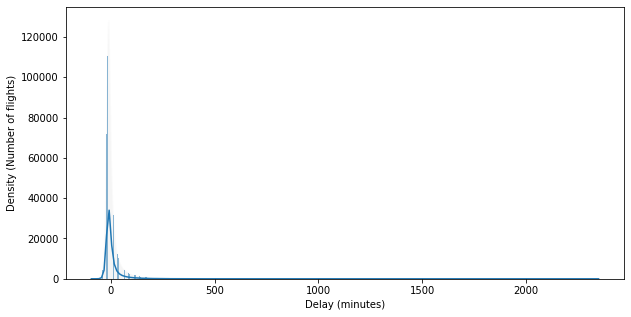

In [28]:
# Arrival Delays with outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(x = df_flight['arr_delay'], kde = True)

In [29]:
# Upper limit and lower limit using 3 standard deviations.
upper = df_flight.arr_delay.mean() + 3 * df_flight.arr_delay.std()
lower = df_flight.arr_delay.mean() - 3 * df_flight.arr_delay.std()
print(upper)
print(lower)

157.3344825342959
-146.38320794042147


In [30]:
# Filter out the outliers
df_flight = df_flight[(df_flight.arr_delay < upper) & (df_flight.arr_delay > lower)]

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

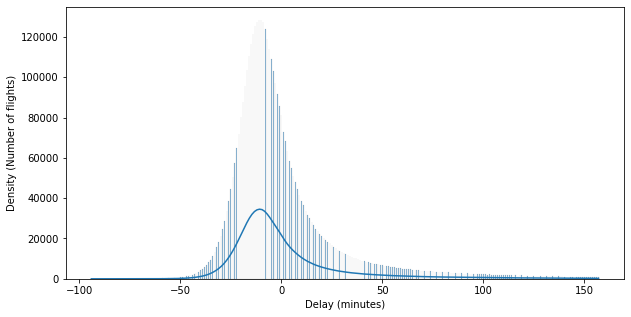

In [31]:
# Arrival Delays without outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(x = df_flight['arr_delay'], kde = True)

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

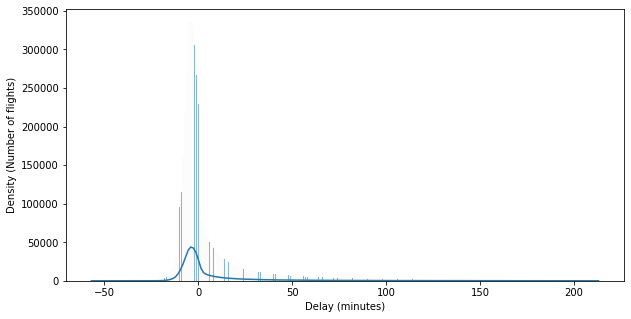

In [32]:
# Departure Delays with outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(x = df_flight['dep_delay'], kde = True)

In [33]:
# Upper limit and lower limit using 3 standard deviations.
upper = df_flight.arr_delay.mean() + 3 * df_flight.arr_delay.std()
lower = df_flight.arr_delay.mean() - 3 * df_flight.arr_delay.std()
print(upper)
print(lower)

86.66926622098944
-84.84954469476065


In [34]:
# Filter out the outliers
df_flight = df_flight[(df_flight.arr_delay < upper) & (df_flight.arr_delay > lower)]

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

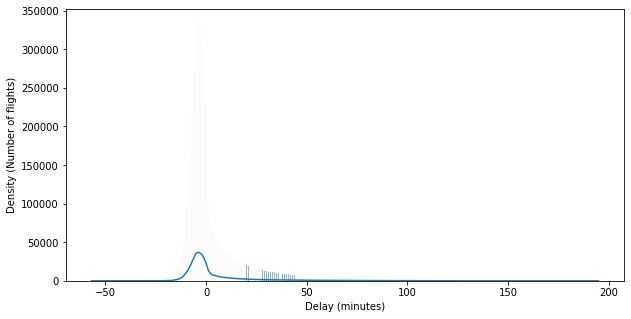

In [35]:
# Departure Delays without outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(x = df_flight['dep_delay'], kde = True)

In [36]:
# Save pd as csv
df_flight.to_csv('data_for_modeling_final_2022-10-28_1227.csv', index=False)